# Forest Cover Classification Using KNN

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [2]:
# Reading the dataset
data_set = pd.read_csv("covtype.csv")
data_set.shape

(581012, 55)

In [3]:
# Separating the input features and target variable
X = data_set.iloc[:, :-1]
y = data_set['Cover_Type']

In [4]:
# Checking for missing values
missing_values = X.isnull().sum().sum()
print("Number of missing values in the dataset:",missing_values)

Number of missing values in the dataset: 0


In [5]:
# Normalizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Splitting the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
X_train.shape

(464809, 54)

In [8]:
X_test.shape

(116203, 54)

## Determining the optimal/best value of K (number of neighbours)

In [10]:
k_values = range(1, 21)

accuracies = []
precisions = []
recalls = []
f1_scores = []

In [11]:
for k in k_values:
    # Initialize and train the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predict the training set results
    y_train_pred = knn.predict(X_train)
    
    # Compute the performance metrics
    accuracies.append(accuracy_score(y_train, y_train_pred))
    precisions.append(precision_score(y_train, y_train_pred, average='weighted'))
    recalls.append(recall_score(y_train, y_train_pred, average='weighted'))
    f1_scores.append(f1_score(y_train, y_train_pred, average='weighted'))

In [12]:
acc100 = [el*100 for el in accuracies]
pre100 = [el*100 for el in precisions]
rec100 = [el*100 for el in recalls]
f1100 = [el*100 for el in f1_scores]

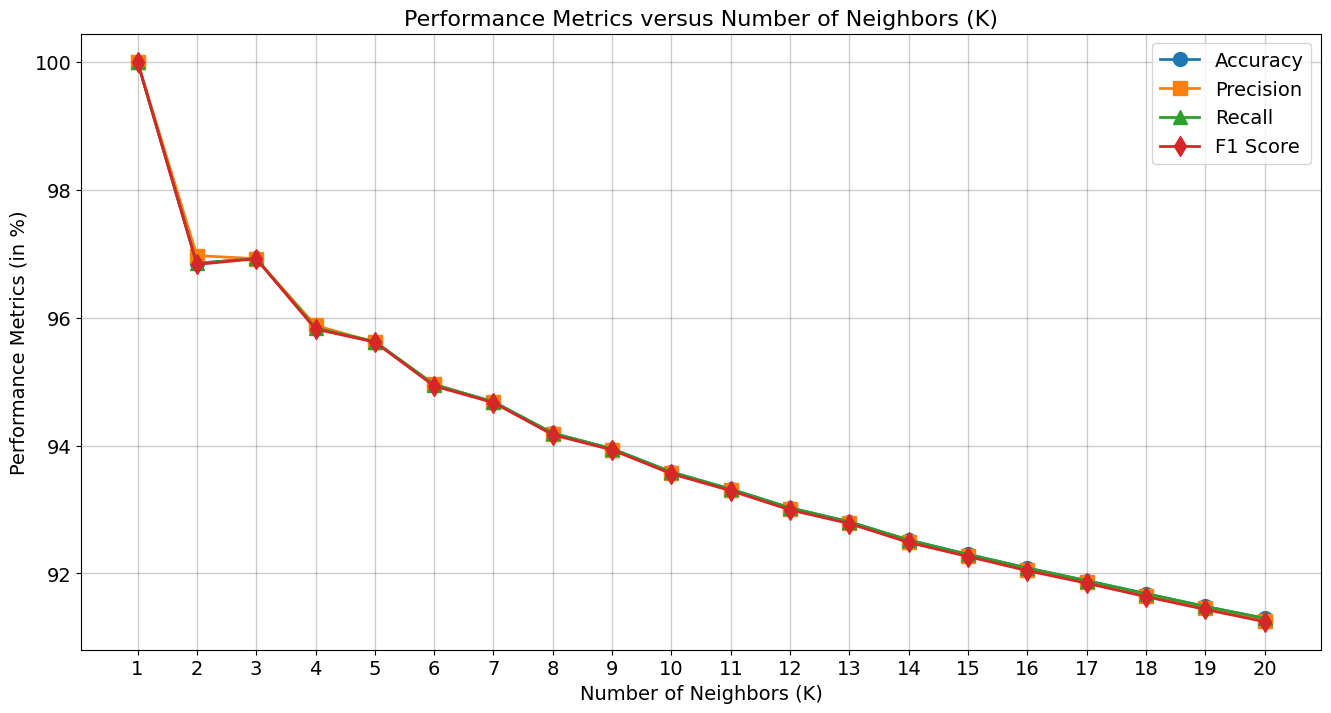

In [13]:
plt.figure(figsize=(16,8))
plt.plot(k_values, acc100, marker='o', label='Accuracy', markersize=10, linewidth=2)
plt.plot(k_values, pre100, marker='s', label='Precision', markersize=10, linewidth=2)
plt.plot(k_values, rec100, marker='^', label='Recall', markersize=10, linewidth=2)
plt.plot(k_values, f1100, marker='d', label='F1 Score', markersize=10, linewidth=2)
plt.xlabel('Number of Neighbors (K)', color='black', fontsize=14)
plt.ylabel('Performance Metrics (in %)', color='black', fontsize=14)
plt.title('Performance Metrics versus Number of Neighbors (K)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=1, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.xticks(k_values)
plt.show()

From the above plot, the optimal/best value of K was found to be 1

### Best Value of K

In [9]:
# Initializing and training the KNN classifier
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
y_train_pred1 = knn1.predict(X_train)

In [10]:
# Computing the performance metrics for the training subset
train_accuracy1 = accuracy_score(y_train, y_train_pred1)
train_precision1 = precision_score(y_train, y_train_pred1, average='weighted')
train_recall1 = recall_score(y_train, y_train_pred1, average='weighted')
train_f1_1 = f1_score(y_train, y_train_pred1, average='weighted')

print("Training Accuracy (in %):",round(train_accuracy1*100,3))
print("Training Precision (in %):",round(train_precision1*100,3))
print("Training Recall (in %):",round(train_recall1*100,3))
print("Training F1 Score (in %):",round(train_f1_1*100,3))

Training Accuracy (in %): 100.0
Training Precision (in %): 100.0
Training Recall (in %): 100.0
Training F1 Score (in %): 100.0


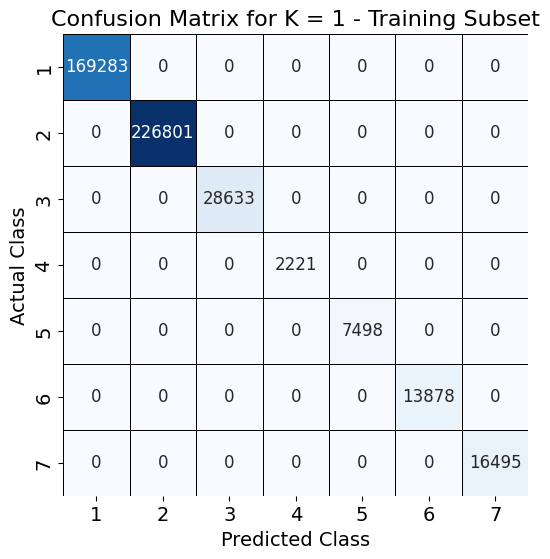

In [11]:
conf_mat_train1 = confusion_matrix(y_train,y_train_pred1)

plt.figure(figsize=(6,6))
sns.heatmap(conf_mat_train1, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=knn1.classes_, yticklabels=knn1.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = 1 - Training Subset', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

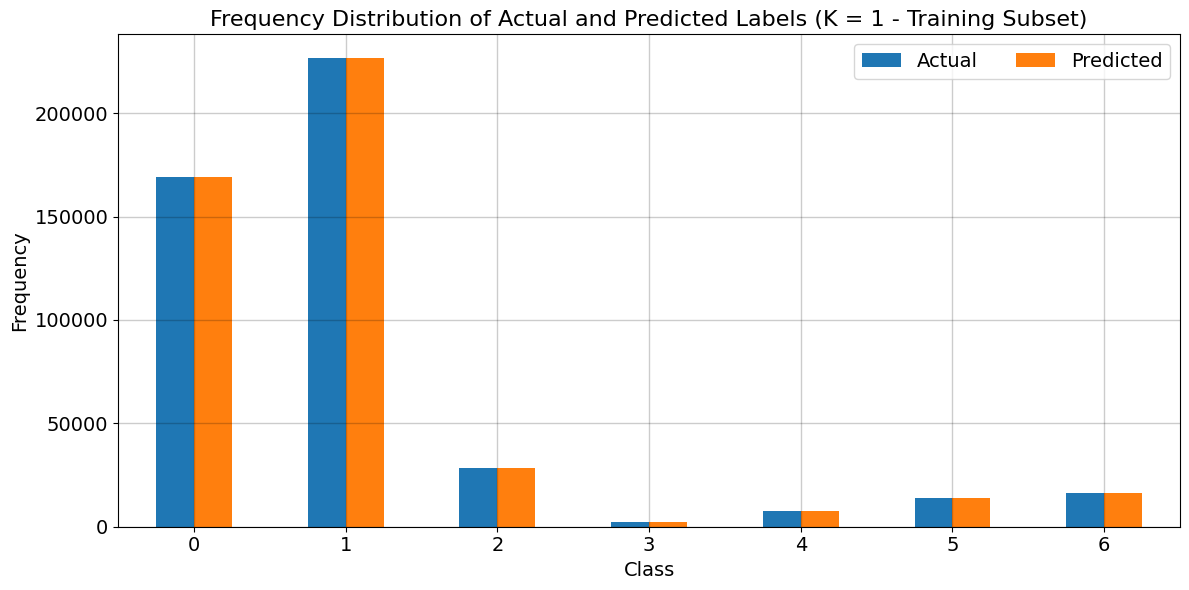

In [12]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Subset)
actual_labels_train, actual_counts_train = np.unique(y_train, return_counts=True)
predicted_labels_train1, predicted_counts_train1 = np.unique(y_train_pred1, return_counts=True)

labels_train = np.unique(y_train)

x_train = np.arange(len(labels_train))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_train = ax.bar(x_train - width/2, actual_counts_train, width, label='Actual')
rects2_train = ax.bar(x_train + width/2, predicted_counts_train1, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (K = 1 - Training Subset)', color='black', fontsize=16)
ax.set_xticks(x_train)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_train) - 0.5]) 
fig.tight_layout()
plt.show()

In [13]:
# Predictions for the test set
y_test_pred1 = knn1.predict(X_test)

In [14]:
# Computing the performance metrics for the test subset
test_accuracy1 = accuracy_score(y_test, y_test_pred1)
test_precision1 = precision_score(y_test, y_test_pred1, average='weighted')
test_recall1 = recall_score(y_test, y_test_pred1, average='weighted')
test_f1_1 = f1_score(y_test, y_test_pred1, average='weighted')

print("Test Accuracy (in %):",round(test_accuracy1*100,3))
print("Test Precision (in %):",round(test_precision1*100,3))
print("Test Recall (in %):",round(test_recall1*100,3))
print("Test F1 Score (in %):",round(test_f1_1*100,3))

Test Accuracy (in %): 93.554
Test Precision (in %): 93.552
Test Recall (in %): 93.554
Test F1 Score (in %): 93.553


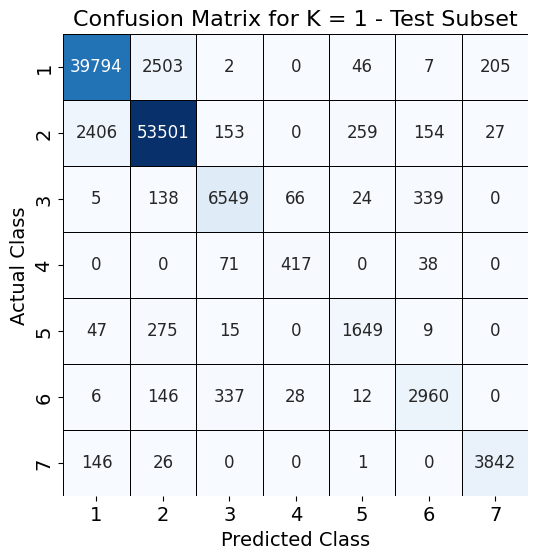

In [15]:
conf_mat_test1 = confusion_matrix(y_test,y_test_pred1)

plt.figure(figsize=(6,6))
sns.heatmap(conf_mat_test1, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=knn1.classes_, yticklabels=knn1.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = 1 - Test Subset', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

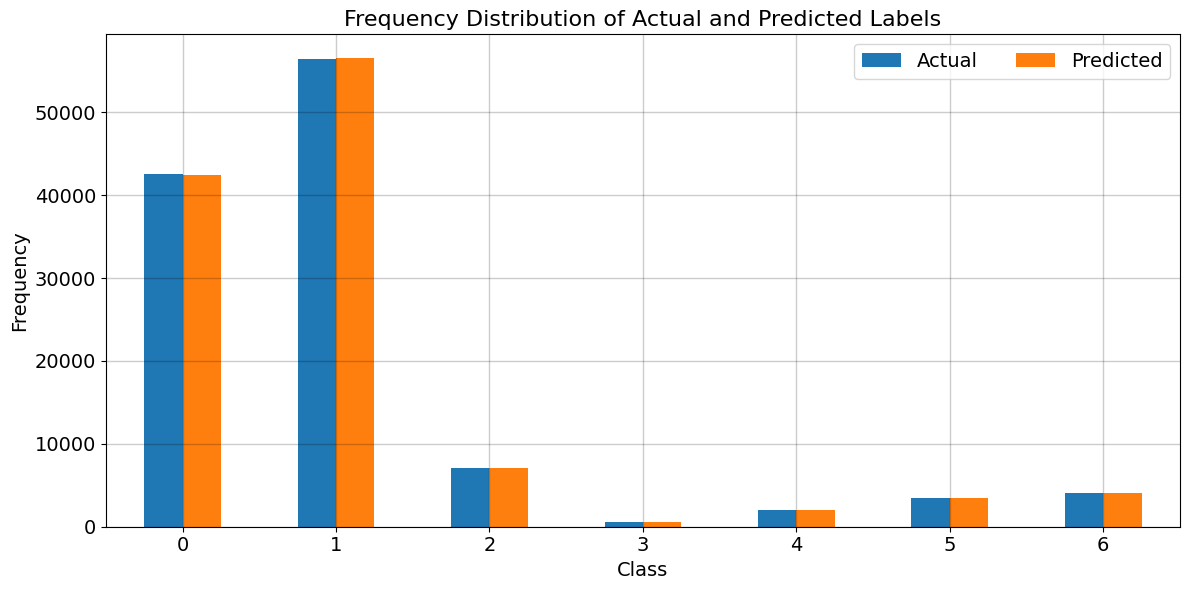

In [19]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Subset)
actual_labels_test, actual_counts_test = np.unique(y_test, return_counts=True)
predicted_labels_test1, predicted_counts_test1 = np.unique(y_test_pred1, return_counts=True)

labels_test = np.unique(y_test)

x_test = np.arange(len(labels_test))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_test = ax.bar(x_test - width/2, actual_counts_test, width, label='Actual')
rects2_test = ax.bar(x_test + width/2, predicted_counts_test1, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Confusion Matrix for K = 1 - Test Subset)', color='black', fontsize=16)
ax.set_xticks(x_test)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_test) - 0.5]) 
fig.tight_layout()
plt.show()

## Other Values of K

### K = 3

In [16]:
# Initializing and training the KNN classifier
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train, y_train)
y_train_pred2 = knn2.predict(X_train)

In [17]:
# Computing the performance metrics for the training subset
train_accuracy2 = accuracy_score(y_train, y_train_pred2)
train_precision2 = precision_score(y_train, y_train_pred2, average='weighted')
train_recall2 = recall_score(y_train, y_train_pred2, average='weighted')
train_f1_2 = f1_score(y_train, y_train_pred2, average='weighted')

print("Training Accuracy (in %):",round(train_accuracy2*100,3))
print("Training Precision (in %):",round(train_precision2*100,3))
print("Training Recall (in %):",round(train_recall2*100,3))
print("Training F1 Score (in %):",round(train_f1_2*100,3))

Training Accuracy (in %): 96.924
Training Precision (in %): 96.92
Training Recall (in %): 96.924
Training F1 Score (in %): 96.921


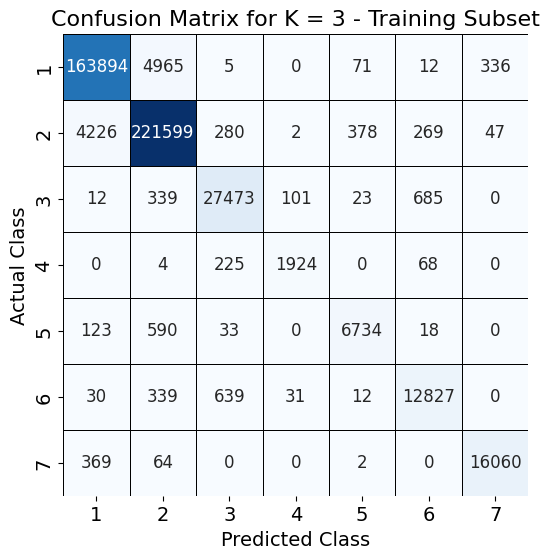

In [18]:
conf_mat_train2 = confusion_matrix(y_train,y_train_pred2)

plt.figure(figsize=(6,6))
sns.heatmap(conf_mat_train2, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=knn2.classes_, yticklabels=knn2.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = 3 - Training Subset', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

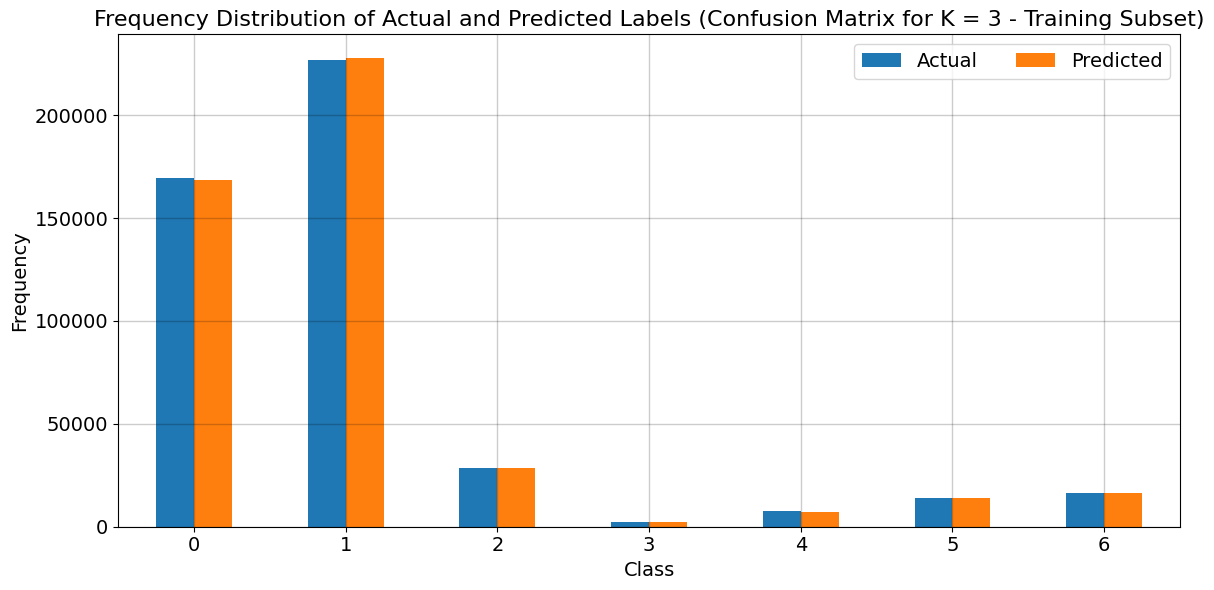

In [19]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Subset)
actual_labels_train, actual_counts_train = np.unique(y_train, return_counts=True)
predicted_labels_train2, predicted_counts_train2 = np.unique(y_train_pred2, return_counts=True)

labels_train = np.unique(y_train)

x_train = np.arange(len(labels_train))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_train = ax.bar(x_train - width/2, actual_counts_train, width, label='Actual')
rects2_train = ax.bar(x_train + width/2, predicted_counts_train2, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Confusion Matrix for K = 3 - Training Subset)', color='black', fontsize=16)
ax.set_xticks(x_train)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_train) - 0.5]) 
fig.tight_layout()
plt.show()

In [20]:
# Predictions for the test set
y_test_pred2 = knn2.predict(X_test)

In [21]:
# Computing the performance metrics for the test subset
test_accuracy2 = accuracy_score(y_test, y_test_pred2)
test_precision2 = precision_score(y_test, y_test_pred2, average='weighted')
test_recall2 = recall_score(y_test, y_test_pred2, average='weighted')
test_f1_2 = f1_score(y_test, y_test_pred2, average='weighted')

print("Test Accuracy (in %):",round(test_accuracy2*100,3))
print("Test Precision (in %):",round(test_precision2*100,3))
print("Test Recall (in %):",round(test_recall2*100,3))
print("Test F1 Score (in %):",round(test_f1_2*100,3))

Test Accuracy (in %): 93.244
Test Precision (in %): 93.224
Test Recall (in %): 93.244
Test F1 Score (in %): 93.229


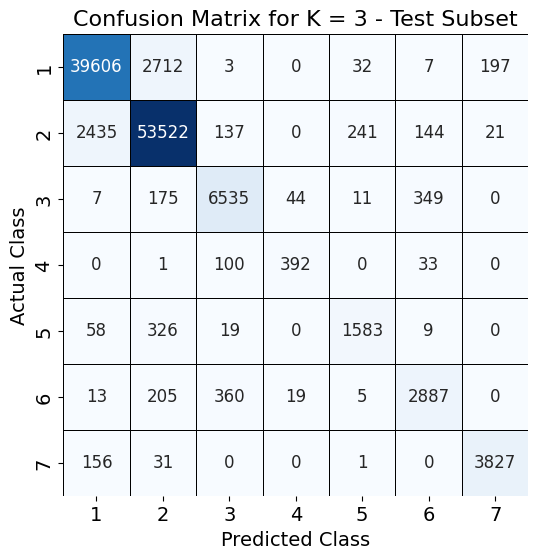

In [22]:
conf_mat_test2 = confusion_matrix(y_test,y_test_pred2)

plt.figure(figsize=(6,6))
sns.heatmap(conf_mat_test2, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=knn2.classes_, yticklabels=knn2.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = 3 - Test Subset', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

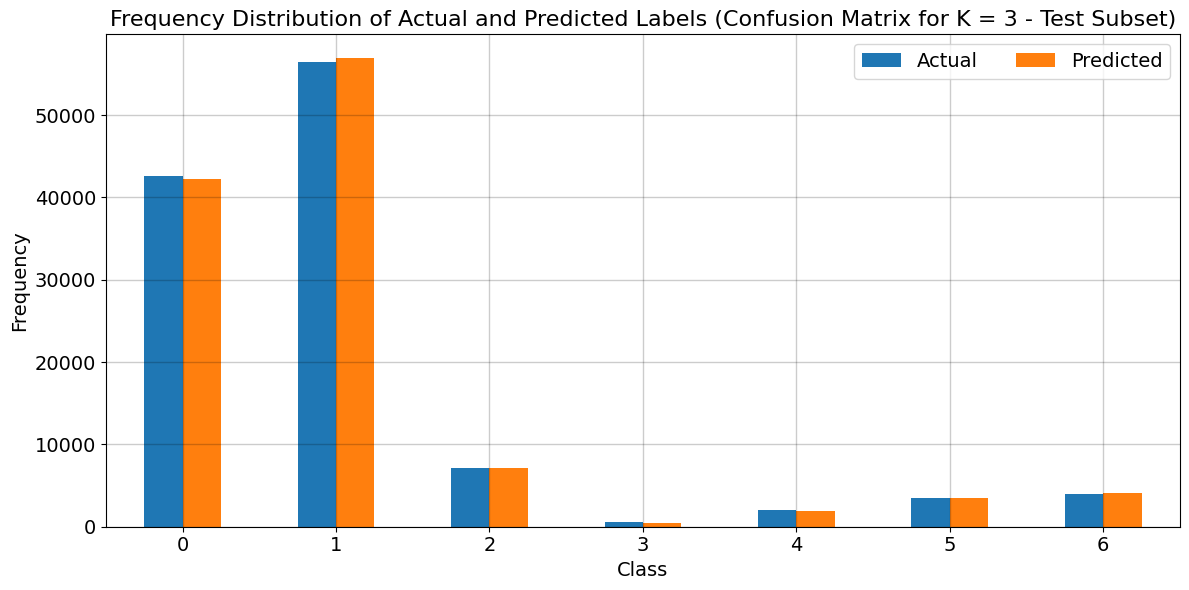

In [23]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Subset)
actual_labels_test, actual_counts_test = np.unique(y_test, return_counts=True)
predicted_labels_test2, predicted_counts_test2 = np.unique(y_test_pred2, return_counts=True)

labels_test = np.unique(y_test)

x_test = np.arange(len(labels_test))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_test = ax.bar(x_test - width/2, actual_counts_test, width, label='Actual')
rects2_test = ax.bar(x_test + width/2, predicted_counts_test2, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Confusion Matrix for K = 3 - Test Subset)', color='black', fontsize=16)
ax.set_xticks(x_test)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_test) - 0.5]) 
fig.tight_layout()
plt.show()

### K = 5

In [24]:
# Initializing and training the KNN classifier
knn3 = KNeighborsClassifier(n_neighbors=5)
knn3.fit(X_train, y_train)
y_train_pred3 = knn3.predict(X_train)

In [25]:
# Computing the performance metrics for the training subset
train_accuracy3 = accuracy_score(y_train, y_train_pred3)
train_precision3 = precision_score(y_train, y_train_pred3, average='weighted')
train_recall3 = recall_score(y_train, y_train_pred3, average='weighted')
train_f1_3 = f1_score(y_train, y_train_pred3, average='weighted')

print("Training Accuracy (in %):",round(train_accuracy3*100,3))
print("Training Precision (in %):",round(train_precision3*100,3))
print("Training Recall (in %):",round(train_recall3*100,3))
print("Training F1 Score (in %):",round(train_f1_3*100,3))

Training Accuracy (in %): 95.624
Training Precision (in %): 95.616
Training Recall (in %): 95.624
Training F1 Score (in %): 95.616


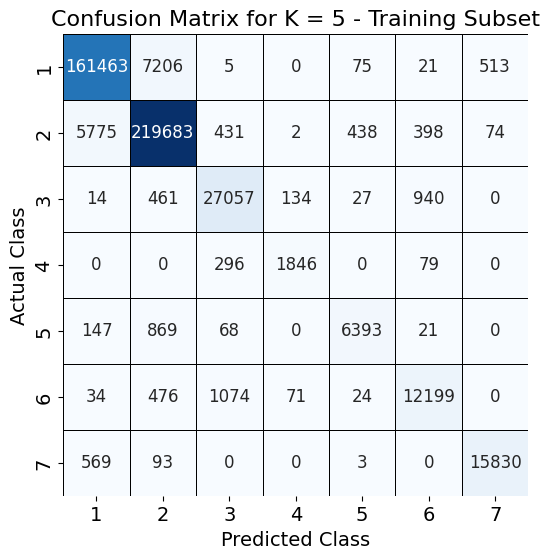

In [26]:
conf_mat_train3 = confusion_matrix(y_train,y_train_pred3)

plt.figure(figsize=(6,6))
sns.heatmap(conf_mat_train3, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=knn3.classes_, yticklabels=knn3.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = 5 - Training Subset', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

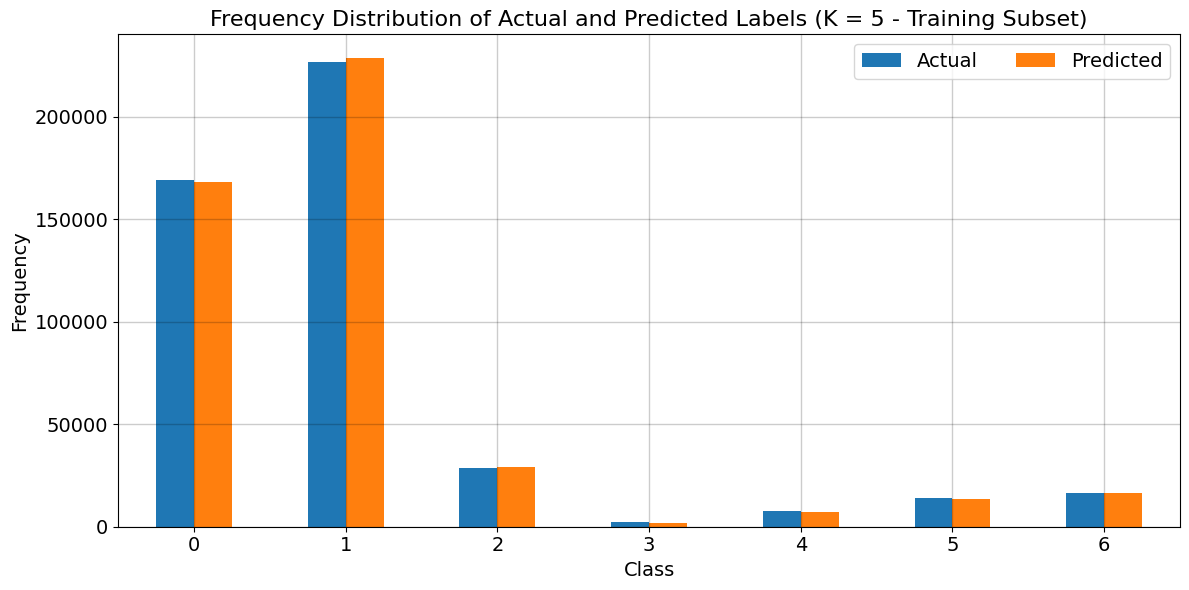

In [27]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Subset)
actual_labels_train, actual_counts_train = np.unique(y_train, return_counts=True)
predicted_labels_train3, predicted_counts_train3 = np.unique(y_train_pred3, return_counts=True)

labels_train = np.unique(y_train)

x_train = np.arange(len(labels_train))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_train = ax.bar(x_train - width/2, actual_counts_train, width, label='Actual')
rects2_train = ax.bar(x_train + width/2, predicted_counts_train3, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (K = 5 - Training Subset)', color='black', fontsize=16)
ax.set_xticks(x_train)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_train) - 0.5]) 
fig.tight_layout()
plt.show()

In [28]:
# Predictions for the test set
y_test_pred3 = knn3.predict(X_test)

In [29]:
# Computing the performance metrics for the test subset
test_accuracy3 = accuracy_score(y_test, y_test_pred3)
test_precision3 = precision_score(y_test, y_test_pred3, average='weighted')
test_recall3 = recall_score(y_test, y_test_pred3, average='weighted')
test_f1_3 = f1_score(y_test, y_test_pred3, average='weighted')

print("Test Accuracy (in %):",round(test_accuracy3*100,3))
print("Test Precision (in %):",round(test_precision3*100,3))
print("Test Recall (in %):",round(test_recall3*100,3))
print("Test F1 Score (in %):",round(test_f1_3*100,3))

Test Accuracy (in %): 92.802
Test Precision (in %): 92.776
Test Recall (in %): 92.802
Test F1 Score (in %): 92.778


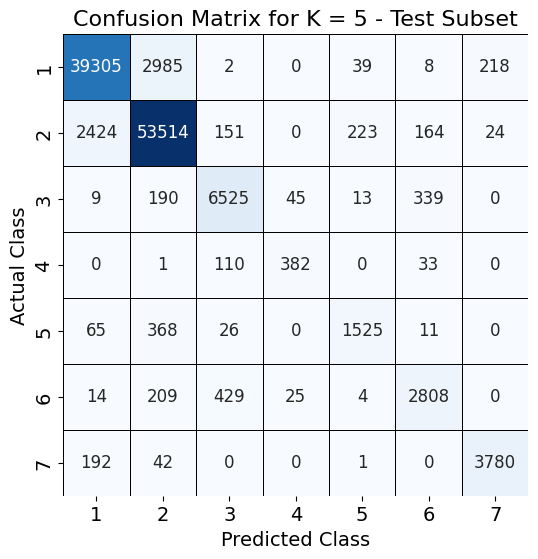

In [30]:
conf_mat_test3 = confusion_matrix(y_test,y_test_pred3)

plt.figure(figsize=(6,6))
sns.heatmap(conf_mat_test3, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=knn3.classes_, yticklabels=knn3.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = 5 - Test Subset', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

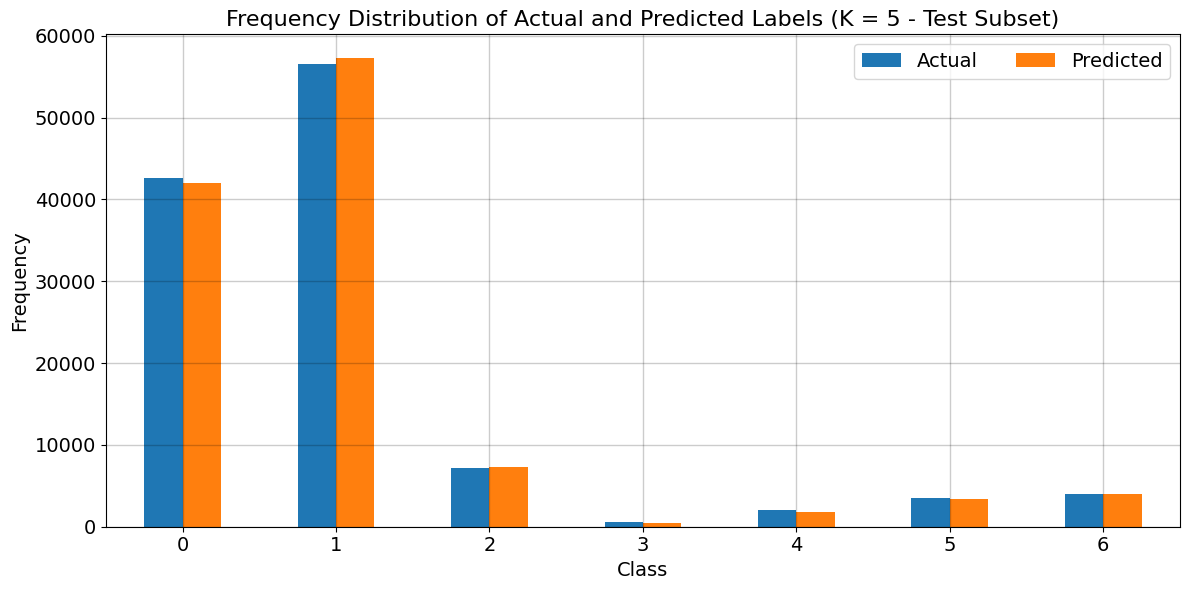

In [31]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Subset)
actual_labels_test, actual_counts_test = np.unique(y_test, return_counts=True)
predicted_labels_test3, predicted_counts_test3 = np.unique(y_test_pred3, return_counts=True)

labels_test = np.unique(y_test)

x_test = np.arange(len(labels_test))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_test = ax.bar(x_test - width/2, actual_counts_test, width, label='Actual')
rects2_test = ax.bar(x_test + width/2, predicted_counts_test3, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (K = 5 - Test Subset)', color='black', fontsize=16)
ax.set_xticks(x_test)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_test) - 0.5]) 
fig.tight_layout()
plt.show()

### K = 10

In [32]:
# Initializing and training the KNN classifier
knn4 = KNeighborsClassifier(n_neighbors=10)
knn4.fit(X_train, y_train)
y_train_pred4 = knn4.predict(X_train)

In [33]:
# Computing the performance metrics for the training subset
train_accuracy4 = accuracy_score(y_train, y_train_pred4)
train_precision4 = precision_score(y_train, y_train_pred4, average='weighted')
train_recall4 = recall_score(y_train, y_train_pred4, average='weighted')
train_f1_4 = f1_score(y_train, y_train_pred4, average='weighted')

print("Training Accuracy (in %):",round(train_accuracy4*100,3))
print("Training Precision (in %):",round(train_precision4*100,3))
print("Training Recall (in %):",round(train_recall4*100,3))
print("Training F1 Score (in %):",round(train_f1_4*100,3))

Training Accuracy (in %): 93.585
Training Precision (in %): 93.567
Training Recall (in %): 93.585
Training F1 Score (in %): 93.557


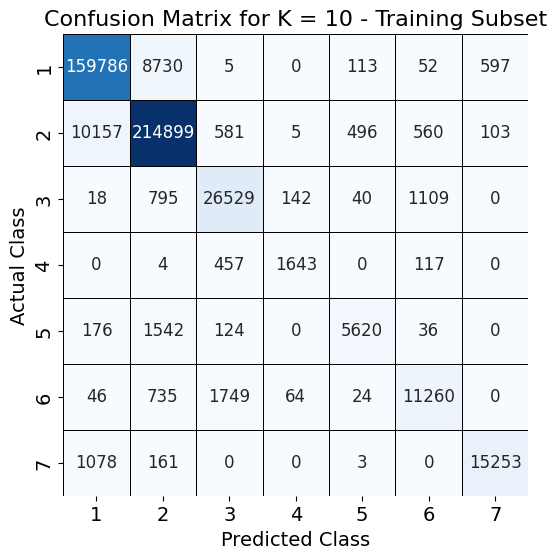

In [34]:
conf_mat_train4 = confusion_matrix(y_train,y_train_pred4)

plt.figure(figsize=(6,6))
sns.heatmap(conf_mat_train4, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=knn4.classes_, yticklabels=knn4.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = 10 - Training Subset', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

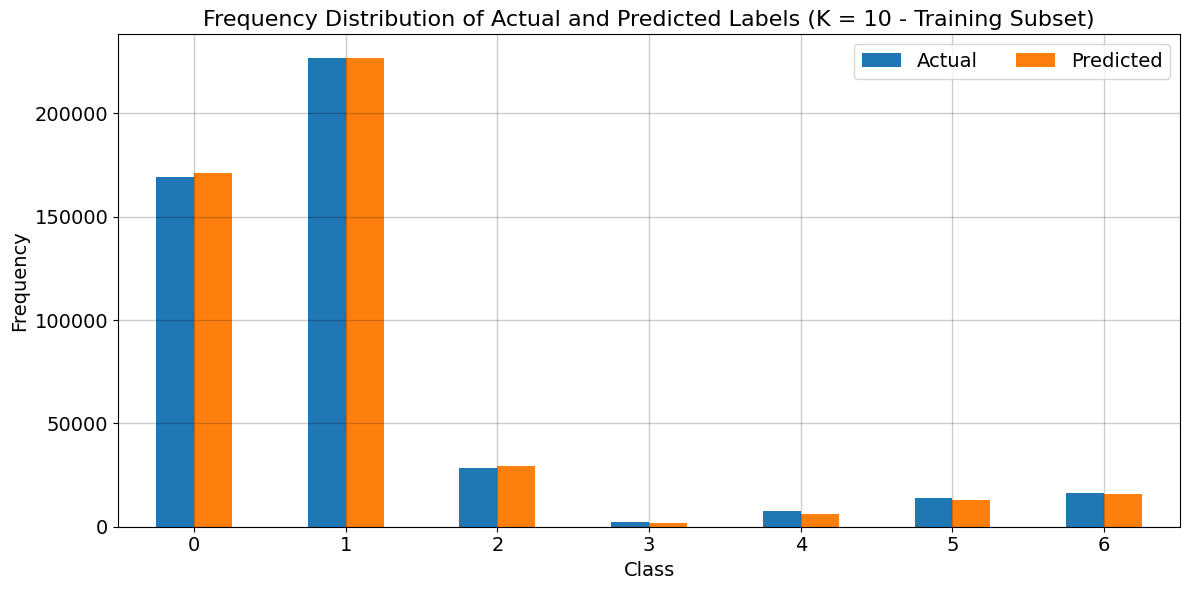

In [35]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Subset)
actual_labels_train, actual_counts_train = np.unique(y_train, return_counts=True)
predicted_labels_train4, predicted_counts_train4 = np.unique(y_train_pred4, return_counts=True)

labels_train = np.unique(y_train)

x_train = np.arange(len(labels_train))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_train = ax.bar(x_train - width/2, actual_counts_train, width, label='Actual')
rects2_train = ax.bar(x_train + width/2, predicted_counts_train4, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (K = 10 - Training Subset)', color='black', fontsize=16)
ax.set_xticks(x_train)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_train) - 0.5]) 
fig.tight_layout()
plt.show()

In [36]:
# Predictions for the test set
y_test_pred4 = knn4.predict(X_test)

In [37]:
# Computing the performance metrics for the test subset
test_accuracy4 = accuracy_score(y_test, y_test_pred4)
test_precision4 = precision_score(y_test, y_test_pred4, average='weighted')
test_recall4 = recall_score(y_test, y_test_pred4, average='weighted')
test_f1_4 = f1_score(y_test, y_test_pred4, average='weighted')

print("Test Accuracy (in %):",round(test_accuracy4*100,3))
print("Test Precision (in %):",round(test_precision4*100,3))
print("Test Recall (in %):",round(test_recall4*100,3))
print("Test F1 Score (in %):",round(test_f1_4*100,3))

Test Accuracy (in %): 91.64
Test Precision (in %): 91.596
Test Recall (in %): 91.64
Test F1 Score (in %): 91.593


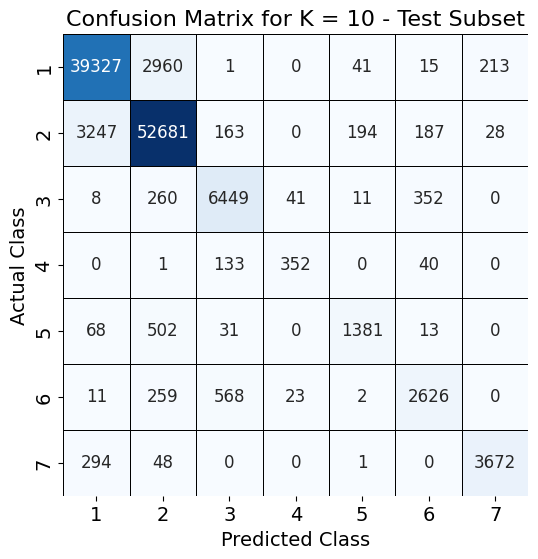

In [38]:
conf_mat_test4 = confusion_matrix(y_test,y_test_pred4)

plt.figure(figsize=(6,6))
sns.heatmap(conf_mat_test4, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=knn4.classes_, yticklabels=knn4.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = 10 - Test Subset', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

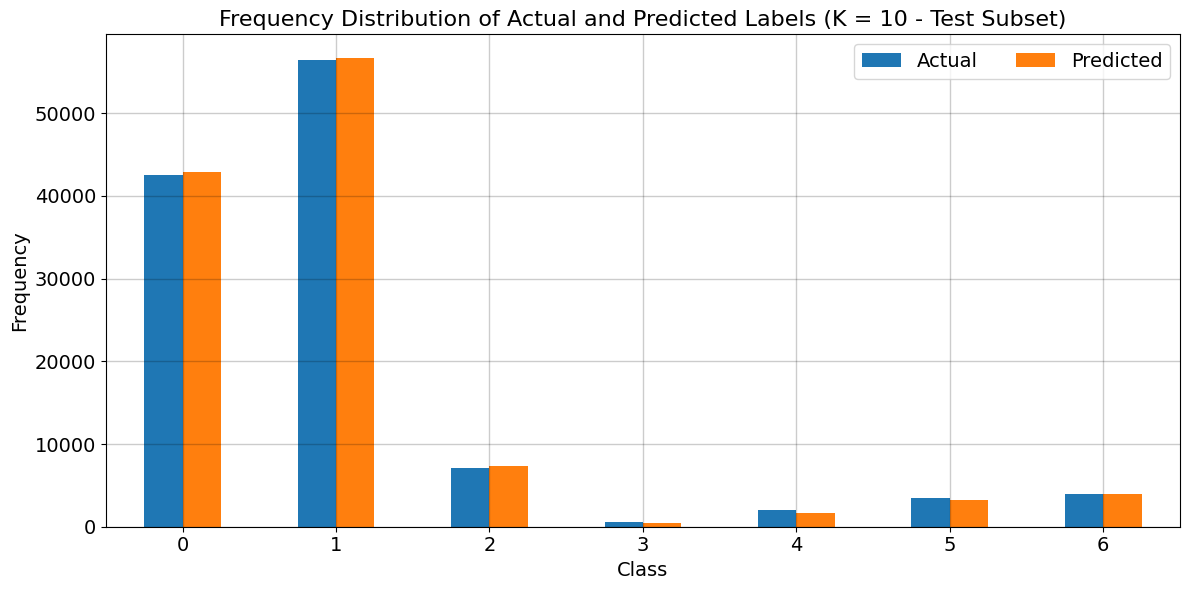

In [39]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Subset)
actual_labels_test, actual_counts_test = np.unique(y_test, return_counts=True)
predicted_labels_test4, predicted_counts_test4 = np.unique(y_test_pred4, return_counts=True)

labels_test = np.unique(y_test)

x_test = np.arange(len(labels_test))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_test = ax.bar(x_test - width/2, actual_counts_test, width, label='Actual')
rects2_test = ax.bar(x_test + width/2, predicted_counts_test4, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (K = 10 - Test Subset)', color='black', fontsize=16)
ax.set_xticks(x_test)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_test) - 0.5]) 
fig.tight_layout()
plt.show()

### K = 20

In [40]:
# Initializing and training the KNN classifier
knn5 = KNeighborsClassifier(n_neighbors=20)
knn5.fit(X_train, y_train)
y_train_pred5 = knn5.predict(X_train)

In [41]:
# Computing the performance metrics for the training subset
train_accuracy5 = accuracy_score(y_train, y_train_pred5)
train_precision5 = precision_score(y_train, y_train_pred5, average='weighted')
train_recall5 = recall_score(y_train, y_train_pred5, average='weighted')
train_f1_5 = f1_score(y_train, y_train_pred5, average='weighted')

print("Training Accuracy (in %):",round(train_accuracy5*100,3))
print("Training Precision (in %):",round(train_precision5*100,3))
print("Training Recall (in %):",round(train_recall5*100,3))
print("Training F1 Score (in %):",round(train_f1_5*100,3))

Training Accuracy (in %): 91.298
Training Precision (in %): 91.257
Training Recall (in %): 91.298
Training F1 Score (in %): 91.245


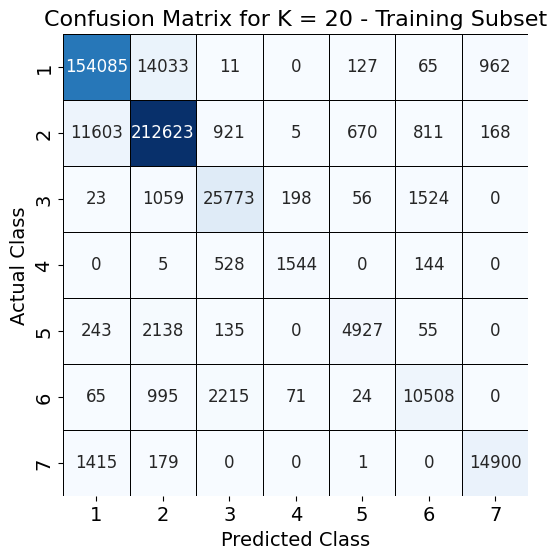

In [42]:
conf_mat_train5 = confusion_matrix(y_train,y_train_pred5)

plt.figure(figsize=(6,6))
sns.heatmap(conf_mat_train5, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=knn5.classes_, yticklabels=knn5.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = 20 - Training Subset', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

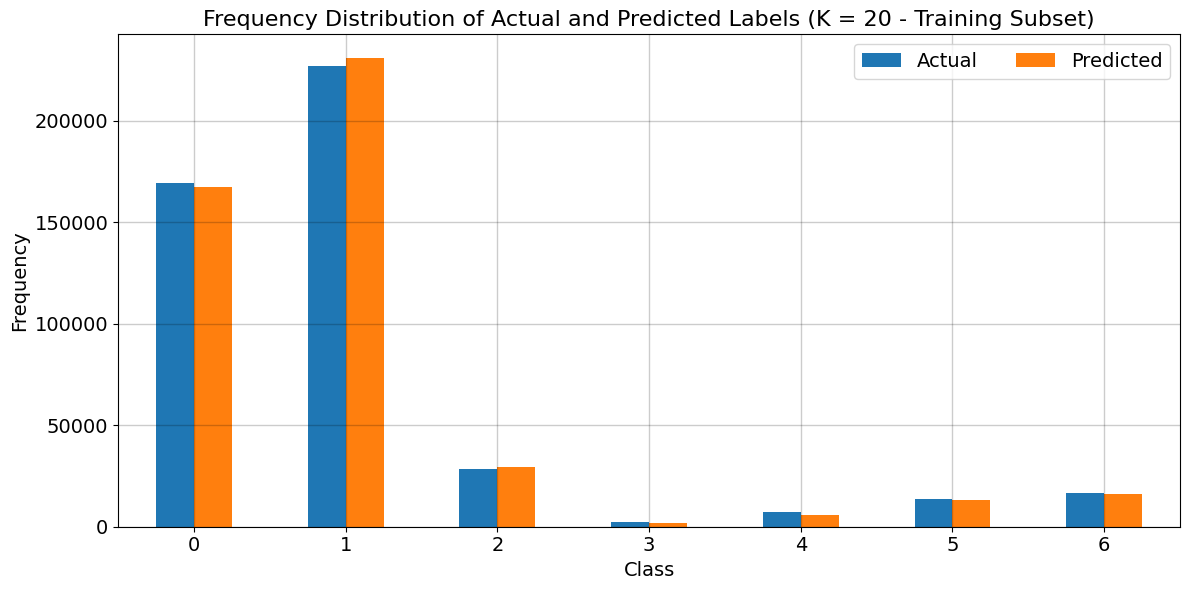

In [43]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Subset)
actual_labels_train, actual_counts_train = np.unique(y_train, return_counts=True)
predicted_labels_train5, predicted_counts_train5 = np.unique(y_train_pred5, return_counts=True)

labels_train = np.unique(y_train)

x_train = np.arange(len(labels_train))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_train = ax.bar(x_train - width/2, actual_counts_train, width, label='Actual')
rects2_train = ax.bar(x_train + width/2, predicted_counts_train5, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (K = 20 - Training Subset)', color='black', fontsize=16)
ax.set_xticks(x_train)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_train) - 0.5]) 
fig.tight_layout()
plt.show()

In [44]:
# Predictions for the test set
y_test_pred5 = knn5.predict(X_test)

In [45]:
# Computing the performance metrics for the test subset
test_accuracy5 = accuracy_score(y_test, y_test_pred5)
test_precision5 = precision_score(y_test, y_test_pred5, average='weighted')
test_recall5 = recall_score(y_test, y_test_pred5, average='weighted')
test_f1_5 = f1_score(y_test, y_test_pred5, average='weighted')

print("Test Accuracy (in %):",round(test_accuracy5*100,3))
print("Test Precision (in %):",round(test_precision5*100,3))
print("Test Recall (in %):",round(test_recall5*100,3))
print("Test F1 Score (in %):",round(test_f1_5*100,3))

Test Accuracy (in %): 90.102
Test Precision (in %): 90.046
Test Recall (in %): 90.102
Test F1 Score (in %): 90.033


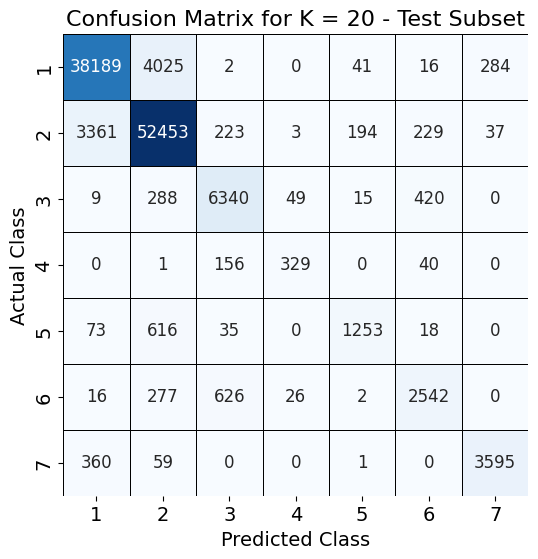

In [46]:
conf_mat_test5 = confusion_matrix(y_test,y_test_pred5)

plt.figure(figsize=(6,6))
sns.heatmap(conf_mat_test5, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=knn5.classes_, yticklabels=knn5.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = 20 - Test Subset', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

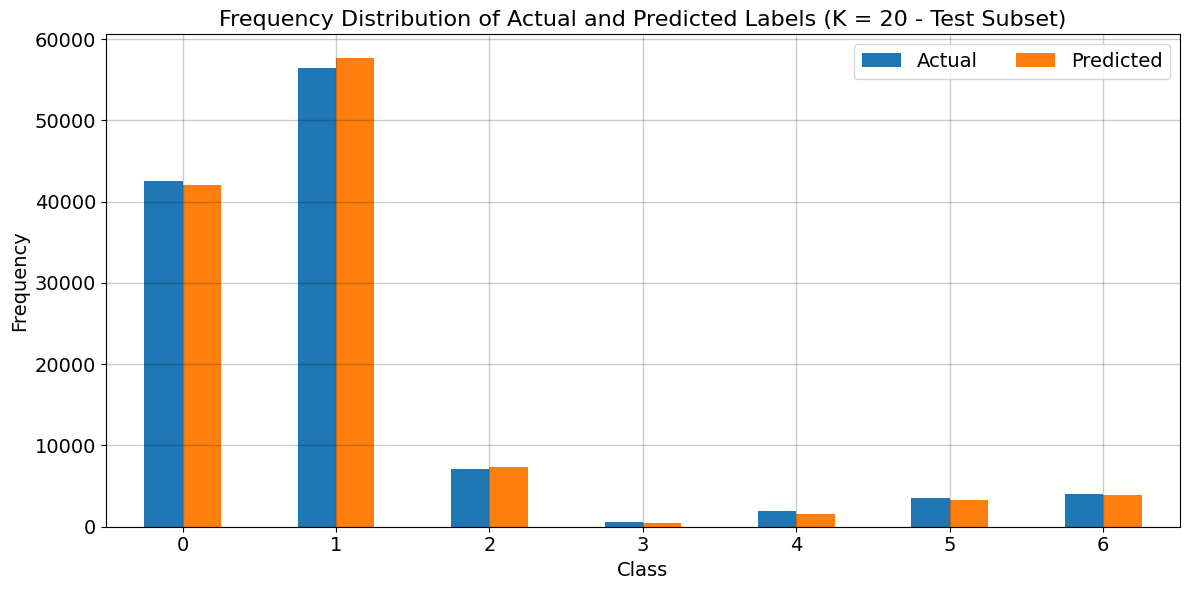

In [47]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Subset)
actual_labels_test, actual_counts_test = np.unique(y_test, return_counts=True)
predicted_labels_test5, predicted_counts_test5 = np.unique(y_test_pred5, return_counts=True)

labels_test = np.unique(y_test)

x_test = np.arange(len(labels_test))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_test = ax.bar(x_test - width/2, actual_counts_test, width, label='Actual')
rects2_test = ax.bar(x_test + width/2, predicted_counts_test5, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (K = 20 - Test Subset)', color='black', fontsize=16)
ax.set_xticks(x_test)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_test) - 0.5]) 
fig.tight_layout()
plt.show()

***